# EDA

- **Objetivo Principal**
    - Desenvolver um modelo preditivo capaz de determinar o resultado (vitória, empate ou derrota) de partidas de futebol com a maior precisão possível.

- **Objetivos específicos**:
    - Identificar os principais fatores que influenciam o resultado das partidas (e.g., desempenho histórico das equipes, estatísticas de jogadores, condições climáticas).


- **Conheça as variáveis**: 
	- Saiba o significado das colunas e o contexto em que os dados foram coletados.
- **Identifique as perguntas-chave**: 
	- O que você espera aprender com a EDA?

In [4]:
import os
import numpy as np
import pandas as pd
from datetime import datetime

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)

In [5]:
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
DATA_DIR = os.path.join(BASE_DIR, 'feature_eng', 'data', 'ft_df.csv')
#FT_DIR = os.path.join(BASE_DIR, 'get_data', 'data')

df = pd.read_csv(os.path.join(DATA_DIR))
df.tail()

,season,rodada,date,match_name,home_team,away_team,winner,home_score,away_score,h_match_points,a_match_points,ht_rank,ht_ls_rank,ht_days_ls_match,ht_points,ht_l_points,ht_l_wavg_points,ht_goals,ht_l_goals,ht_l_wavg_goals,ht_goals_sf,ht_l_goals_sf,ht_l_wavg_goals_sf,ht_wins,ht_draws,ht_losses,ht_win_streak,ht_loss_streak,ht_draw_streak,at_rank,at_ls_rank,at_days_ls_match,at_points,at_l_points,at_l_wavg_points,at_goals,at_l_goals,at_l_wavg_goals,at_goals_sf,at_l_goals_sf,at_l_wavg_goals_sf,at_wins,at_draws,at_losses,at_win_streak,at_loss_streak,at_draw_streak,ls_winner
8247,2008,22,2008-08-23,Figueirense FC - EC Vitória,Figueirense FC,EC Vitória,1,1,2,0,3,17,13.0,3.0,28,1.333333,0.997307,26,8.666667,0.773551,39,8.333333,2.076757,7,7,7,0,1,0,10,-33.0,3.0,33,1.333333,0.940871,31,10.333333,0.927017,23,5.000000,0.785807,10,3,8,0,0,1,AWAY_TEAM
8248,2008,24,2008-09-03,Figueirense FC - Flamengo,Figueirense FC,Flamengo,1,2,3,0,3,17,13.0,4.0,28,0.000000,0.249327,27,9.000000,0.443388,43,9.000000,2.019189,7,7,9,0,3,0,5,4.0,3.0,37,1.666667,1.284778,37,12.333333,1.682233,25,8.666667,1.553689,10,7,6,0,0,2,AWAY_TEAM
8249,2008,26,2008-09-21,Figueirense FC - Cruzeiro,Figueirense FC,Cruzeiro,1,3,4,0,3,17,13.0,7.0,28,0.000000,0.062332,29,9.666667,0.610847,51,10.000000,3.754797,7,7,11,0,5,0,3,5.0,7.0,43,1.333333,0.944149,38,12.666667,0.931318,26,8.000000,1.067338,13,4,8,0,1,0,AWAY_TEAM
8250,2008,36,2008-11-20,Figueirense FC - Náutico,Figueirense FC,Náutico,2,4,3,3,0,17,13.0,4.0,35,0.000000,0.099670,39,13.000000,0.597276,68,14.666667,2.312261,8,11,16,0,3,0,16,15.0,5.0,40,2.333333,2.238732,39,13.000000,2.753156,49,11.333333,1.143404,10,10,15,1,0,0,AWAY_TEAM
8251,2008,37,2008-11-30,Ipatinga FC - Grêmio,Ipatinga FC,Grêmio,1,1,4,0,3,20,-33.0,7.0,34,1.000000,0.949155,35,11.666667,0.888483,62,9.666667,1.629213,9,7,20,0,1,0,2,7.0,7.0,66,2.000000,1.252822,53,17.666667,1.716261,34,12.000000,2.428345,19,9,8,0,1,0,AWAY_TEAM


<Axes: ylabel='count'>

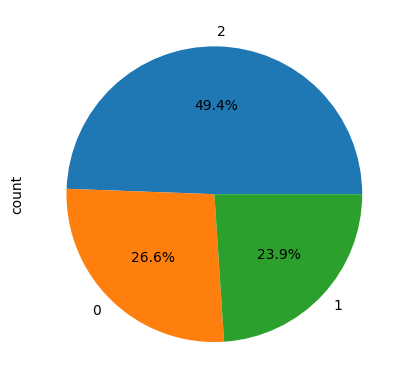

In [6]:
df['winner'].value_counts().plot.pie(autopct='%1.1f%%')


In [7]:
time = 'Flamengo'

dict_times = {'time_1':'Flamengo', 'time_2':None}

df_performance_time = df[(df['home_team'] == dict_times['time_1']) & 
         (df['winner'] == 'HOME_TEAM') | 

         (df['away_team'] == dict_times['time_1']) & 
         (df['winner'] == 'AWAY_TEAM') |

         (df['match_name'].str.contains(dict_times['time_1'])) &
         (df['winner'] == 'DRAW') 
         ]

In [8]:
df_performance_time['winner'].value_counts(normalize=True)#.plot.pie(autopct='%1.1f%%')

Series([], Name: proportion, dtype: float64)

In [9]:
df#'match_name'].str.contains(dict_times['time_1'])

,season,rodada,date,match_name,home_team,away_team,winner,home_score,away_score,h_match_points,a_match_points,ht_rank,ht_ls_rank,ht_days_ls_match,ht_points,ht_l_points,ht_l_wavg_points,ht_goals,ht_l_goals,ht_l_wavg_goals,ht_goals_sf,ht_l_goals_sf,ht_l_wavg_goals_sf,ht_wins,ht_draws,ht_losses,ht_win_streak,ht_loss_streak,ht_draw_streak,at_rank,at_ls_rank,at_days_ls_match,at_points,at_l_points,at_l_wavg_points,at_goals,at_l_goals,at_l_wavg_goals,at_goals_sf,at_l_goals_sf,at_l_wavg_goals_sf,at_wins,at_draws,at_losses,at_win_streak,at_loss_streak,at_draw_streak,ls_winner
0,2010,1,2010-05-09,Flamengo - São Paulo,Flamengo,São Paulo,0,1,1,1,1,14,1.0,-33.0,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0,0,0,0,0,9,3.0,-33.0,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0,0,0,0,0,AWAY_TEAM
1,2010,3,2010-05-23,Internacional - São Paulo,Internacional,São Paulo,1,0,2,0,3,7,2.0,7.0,3,1.000000,1.500000,4,1.333333,2.000000,4,1.666667,2.000000,1,0,1,1,0,0,9,3.0,7.0,1,0.333333,0.500000,2,0.666667,1.000000,3,1.000000,1.500000,0,1,1,0,1,0,AWAY_TEAM
2,2010,4,2010-05-26,São Paulo - Palmeiras,São Paulo,Palmeiras,2,1,0,3,0,9,3.0,3.0,4,1.333333,1.750000,4,1.333333,1.500000,3,1.666667,0.750000,1,1,1,1,0,0,10,4.0,4.0,7,2.333333,2.500000,5,1.666667,2.250000,2,0.666667,1.000000,2,1,0,1,0,0,AWAY_TEAM
3,2010,5,2010-05-29,Palmeiras - Barueri,Palmeiras,Barueri,0,0,0,1,1,10,4.0,3.0,7,1.333333,1.250000,5,1.666667,1.125000,3,0.666667,1.000000,2,1,1,0,1,0,20,11.0,3.0,4,1.333333,0.875000,8,2.666667,1.875000,11,1.333333,2.500000,1,1,2,0,0,1,AWAY_TEAM
4,2010,5,2010-05-30,Guarani - São Paulo,Guarani,São Paulo,0,0,0,1,1,18,-33.0,4.0,5,0.666667,0.750000,6,2.000000,1.375000,7,1.666667,2.250000,1,2,1,0,1,0,9,3.0,4.0,7,2.000000,2.375000,5,1.666667,1.250000,3,1.666667,0.375000,2,1,1,2,0,0,AWAY_TEAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8247,2008,22,2008-08-23,Figueirense FC - EC Vitória,Figueirense FC,EC Vitória,1,1,2,0,3,17,13.0,3.0,28,1.333333,0.997307,26,8.666667,0.773551,39,8.333333,2.076757,7,7,7,0,1,0,10,-33.0,3.0,33,1.333333,0.940871,31,10.333333,0.927017,23,5.000000,0.785807,10,3,8,0,0,1,AWAY_TEAM
8248,2008,24,2008-09-03,Figueirense FC - Flamengo,Figueirense FC,Flamengo,1,2,3,0,3,17,13.0,4.0,28,0.000000,0.249327,27,9.000000,0.443388,43,9.000000,2.019189,7,7,9,0,3,0,5,4.0,3.0,37,1.666667,1.284778,37,12.333333,1.682233,25,8.666667,1.553689,10,7,6,0,0,2,AWAY_TEAM
8249,2008,26,2008-09-21,Figueirense FC - Cruzeiro,Figueirense FC,Cruzeiro,1,3,4,0,3,17,13.0,7.0,28,0.000000,0.062332,29,9.666667,0.610847,51,10.000000,3.754797,7,7,11,0,5,0,3,5.0,7.0,43,1.333333,0.944149,38,12.666667,0.931318,26,8.000000,1.067338,13,4,8,0,1,0,AWAY_TEAM
8250,2008,36,2008-11-20,Figueirense FC - Náutico,Figueirense FC,Náutico,2,4,3,3,0,17,13.0,4.0,35,0.000000,0.099670,39,13.000000,0.597276,68,14.666667,2.312261,8,11,16,0,3,0,16,15.0,5.0,40,2.333333,2.238732,39,13.000000,2.753156,49,11.333333,1.143404,10,10,15,1,0,0,AWAY_TEAM


### Feature: Força do time
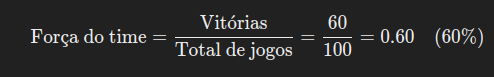


Um gráfico exibindo a força de um time ao longo do tempo seria legal 

In [10]:
df.sort_values(by='date', ascending=False, inplace=True)

In [11]:
time = 'Flamengo'

dict_times = {'time_1':'Flamengo', 'time_2':'São Paulo'}

df_performance_time = df[(df['home_team'] == dict_times['time_1']) & 
         (df['winner'] == 'HOME_TEAM') | 

         (df['away_team'] == dict_times['time_1']) & 
         (df['winner'] == 'AWAY_TEAM') |

         (df['match_name'].str.contains(dict_times['time_1'])) &
         (df['winner'] == 'DRAW') 
         ]

In [12]:
# Query para saber se o time 1 ganhou

def get_performace_time(time, dias_atras=30):
    df_time = df[(df['match_name'].str.contains(time))].iloc[0:dias_atras]

    qtd_home_vitoria = df_time[(df_time['home_team'] == time) & 
                        (df_time['winner'] == 'HOME_TEAM')
                        ].shape[0]

    qtd_away_vitoria = df_time[(df_time['away_team'] == time) & 
                        (df_time['winner'] == 'AWAY_TEAM')
                        ].shape[0]

    qtd_home_derrotas = df_time[(df_time['home_team'] == time) & 
                        (df_time['winner'] == 'AWAY_TEAM')
                        ].shape[0]

    qtd_away_derrotas = df_time[(df_time['away_team'] == time) & 
                        (df_time['winner'] == 'HOME_TEAM')
                        ].shape[0]

    qtd_draw = df_time[(df_time['winner'] == 'DRAW')].shape[0]

    return qtd_home_vitoria, qtd_away_vitoria, qtd_home_derrotas, qtd_away_derrotas, qtd_draw


def team_strength(vitorias, total_jogos):
    """
    A maneira mais básica de calcular a força de um time é observar a taxa de vitórias e derrotas ao longo de um período de tempo. Um cálculo simples seria a porcentagem de vitórias em relação ao total de jogos.
    """
    return (vitorias/total_jogos)

qtd_home_vitoria, qtd_away_vitoria, qtd_home_derrotas, qtd_away_derrotas, qtd_draw = get_performace_time(time=dict_times['time_1'])
total_jogos = qtd_home_vitoria+qtd_away_vitoria+qtd_home_derrotas+qtd_away_derrotas+qtd_draw
vitorias = qtd_home_vitoria+qtd_away_vitoria

team_strength(vitorias=vitorias, total_jogos=total_jogos)


ZeroDivisionError: division by zero

### Feature: Elo Rating

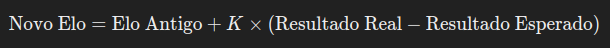

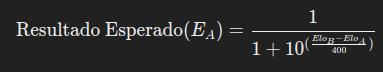

In [ ]:
# POSITIVO: time da casa ganhou e time visitante perdeu
# NEGATIVO: time visitante ganhou e time da casa perdeu
# 0: Houve empate

In [ ]:

#df_all = df[df['season']==2022].sort_values(by='date')
df_all = df[df['season']==2023].sort_values(by='date')

list_all_time = df_all['home_team'].unique()

df_elo = pd.DataFrame(list_all_time, columns=['team_name'])

df_elo['elo_rating'] = 0
df_elo['quantity_of_games'] = 0

df_elo.head()

,team_name,elo_rating,quantity_of_games
0,América-MG,0,0
1,RB Bragantino,0,0
2,Fortaleza,0,0
3,Athletico-PR,0,0
4,Palmeiras,0,0


In [ ]:
def get_team_index(team_name):
    """
    Obtem o index de pesente na tabela elo passando o nome do time
    """
    return df_elo[df_elo['team_name']==team_name].index[0]

def get_team_elo_rating_by_idx(idx):
    """
    Obtem o elo do time de pesente na tabela elo passando o index do time
    """
    return df_elo.iloc[idx]['elo_rating']

def calc_elo_rating(elo_old, K, actual_result, expected_result):
    """
    Calcula o elo_rating 
    """
    return elo_old + K * (actual_result - expected_result)

def get_expected_result(elo_rating_team_win, elo_rating_team_loss):
    """
    O Resultado Esperado no sistema de Elo Rating é a probabilidade de um time ganhar com base na diferença de pontuação Elo entre os dois times. 
    A fórmula para calcular o Resultado Esperado de um time é:
    """
    diferenca_de_arpad_elo = (elo_rating_team_loss - elo_rating_team_win) / 400

    return 1/((10**diferenca_de_arpad_elo)+1)

def get_new_elo_ratings(
        actual_result_home,
        actual_result_away,
        elo_rating_team_win,
        elo_rating_team_loss,
        K=1):
    
    """
    Junta todas as informações para obter o elo_rating, para o time da casa e visitante
    """
    
    expected_result_home = get_expected_result(elo_rating_team_win=elo_rating_team_win, 
                                              elo_rating_team_loss=elo_rating_team_loss)
    
    expected_result_away = get_expected_result(elo_rating_team_win=elo_rating_team_loss, 
                                              elo_rating_team_loss=elo_rating_team_win)


    new_elo_home =  calc_elo_rating(elo_old=elo_rating_team_win, 
                                    K=K, 
                                    actual_result=actual_result_home, 
                                    expected_result=expected_result_home)
        
    new_elo_away =  calc_elo_rating(elo_old=elo_rating_team_loss, 
                                K=K, 
                                actual_result=actual_result_away, 
                                expected_result=expected_result_away)

    return new_elo_home, new_elo_away


In [ ]:
import time

dict_actual_result = {'WIN':1, 'DRAW':0.5, 'LOSS':0}
K = 10
for idx, row in df_all.iterrows():

    home_team = row['home_team']
    away_team = row['away_team']

    idx_home_team = get_team_index(team_name=row['home_team'])
    idx_away_team = get_team_index(team_name=row['away_team'])

    elo_rating_home_team = get_team_elo_rating_by_idx(idx_home_team)
    elo_rating_away_team = get_team_elo_rating_by_idx(idx_away_team)

    # POSITIVO: time da casa ganhou e time visitante perdeu
    # NEGATIVO: time visitante ganhou e time da casa perdeu
    goal_result = row['home_score'] - row['away_score']

    if goal_result > 0:
        # HOME win and AWAY loss
        actual_result_home = dict_actual_result['WIN']
        actual_result_away = dict_actual_result['LOSS']

        new_elo_home, new_elo_away = get_new_elo_ratings(
                        actual_result_home = actual_result_home,
                        actual_result_away = actual_result_away,
                        elo_rating_team_win = elo_rating_home_team,
                        elo_rating_team_loss = elo_rating_away_team,
                        K=K
                        )
        
    elif goal_result < 0:
        # HOME loss and AWAY win
        actual_result_home = dict_actual_result['LOSS']
        actual_result_away = dict_actual_result['WIN']

        new_elo_home, new_elo_away = get_new_elo_ratings(
                        actual_result_home = actual_result_home,
                        actual_result_away = actual_result_away,
                        elo_rating_team_win = elo_rating_home_team,
                        elo_rating_team_loss = elo_rating_away_team,
                        K=K
                        )
    
    else:
        # HOME draw and AWAY draw
        actual_result_home = dict_actual_result['DRAW']
        actual_result_away = dict_actual_result['DRAW']

        new_elo_home, new_elo_away = get_new_elo_ratings(
                        actual_result_home = actual_result_home,
                        actual_result_away = actual_result_away,
                        elo_rating_team_win = elo_rating_home_team,
                        elo_rating_team_loss = elo_rating_away_team,
                        K=K
                        )
    
    df_all.loc[idx, 'old_elo_rating_home'] = elo_rating_home_team
    df_all.loc[idx, 'old_elo_rating_away'] = elo_rating_away_team
    df_all.loc[idx, 'new_elo_rating_home'] = new_elo_home
    df_all.loc[idx, 'new_elo_rating_away'] = new_elo_away

    df_elo.loc[idx_home_team, 'elo_rating'] = new_elo_home
    df_elo.loc[idx_away_team, 'elo_rating'] = new_elo_away


    #time.sleep(1)
    #print(f'home_team: {home_team}, away_team: {away_team}, goal_result: {goal_result}, new_elo_home: {new_elo_home}, new_elo_away: {new_elo_away}')

    #if idx == 2:
    #    #break
     #   pass

/tmp/ipykernel_6736/259151517.py:64: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-4.856128158340013' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_elo.loc[idx_home_team, 'elo_rating'] = new_elo_home


In [ ]:
# Resultado (Achei bem bacana, se realizar por temporada reflete bem o desempenho de cada equipe)

df_elo.sort_values(by='elo_rating', ascending=False)

,team_name,elo_rating,quantity_of_games
4,Palmeiras,46.277751,0
7,Atlético-MG,38.343088,0
6,Grêmio,35.096359,0
8,Flamengo,34.899274,0
1,RB Bragantino,23.387384,0
5,Botafogo,20.123019,0
3,Athletico-PR,13.455928,0
16,Internacional,11.420920,0
11,Fluminense,5.552177,0
12,São Paulo,5.159331,0


In [ ]:
df_all[["match_name","home_team","away_team","winner","home_score","away_score","old_elo_rating_home","old_elo_rating_away"]].sample(5)

,match_name,home_team,away_team,winner,home_score,away_score,old_elo_rating_home,old_elo_rating_away
599,Internacional - São Paulo,Internacional,São Paulo,HOME_TEAM,2,1,-9.720089,-1.364350
691,Internacional - Grêmio,Internacional,Grêmio,HOME_TEAM,3,2,-13.942612,25.170549
698,Fortaleza - Botafogo,Fortaleza,Botafogo,DRAW,2,2,-13.488171,28.171842
714,Cuiabá-MT - América-MG,Cuiabá-MT,América-MG,DRAW,2,2,-7.827036,-37.496689
707,Goiás - Fluminense,Goiás,Fluminense,DRAW,2,2,-18.702916,9.439946


---

In [ ]:
# Quantas veses um determinado time enfrentou outro time

dict_times = {'time_1':'Palmeiras', 'time_2':'Grêmio'}

# Quantas performace do time 1 em cima do time 2

qtd_ultimos_jogos=40

time_1 = dict_times['time_1']
time_2 = dict_times['time_2']

df_time = df[(df['match_name'].str.contains(time_1)) &
             (df['match_name'].str.contains(time_2))
             ].iloc[0:qtd_ultimos_jogos]


qtd_time_1_vitorias = df_time[(df_time['home_team']==time_1) &
                (df_time['winner']=='HOME_TEAM') |

                (df_time['away_team']==time_1) &
                (df_time['winner']=='AWAY_TEAM')
                ]

qtd_time_1_derrotas = df_time[(df_time['home_team']==time_1) &
                (df_time['winner']=='AWAY_TEAM') |

                (df_time['away_team']==time_1) &
                (df_time['winner']=='HOME_TEAM')
                ]

empate = df_time[df_time['winner']=='DRAW'].shape[0]

print(f'''
      Vitorias {time_1} vs {time_2}: {qtd_time_1_vitorias.shape[0]}, 
      Derrotas {time_1} vs {time_2}: {qtd_time_1_derrotas.shape[0]}, 
      Empates {time_1} vs {time_2}: {empate}

      Qtq jogos: {df_time.shape[0]}, {round(qtd_time_1_vitorias.shape[0] / df_time.shape[0], 2)}%''')



      Vitorias Palmeiras vs Grêmio: 14, 
      Derrotas Palmeiras vs Grêmio: 8, 
      Empates Palmeiras vs Grêmio: 11

      Qtq jogos: 33, 0.42%


In [ ]:
8+14+11

33

In [ ]:

def get_performace_time(time, dias_atras=30):
    df_time = df[(df['match_name'].str.contains(time))].iloc[0:dias_atras]

    qtd_home_vitoria = df_time[(df_time['home_team'] == time) & 
                        (df_time['winner'] == 'HOME_TEAM')
                        ].shape[0]

    qtd_away_vitoria = df_time[(df_time['away_team'] == time) & 
                        (df_time['winner'] == 'AWAY_TEAM')
                        ].shape[0]

    qtd_home_derrotas = df_time[(df_time['home_team'] == time) & 
                        (df_time['winner'] == 'AWAY_TEAM')
                        ].shape[0]

    qtd_away_derrotas = df_time[(df_time['away_team'] == time) & 
                        (df_time['winner'] == 'HOME_TEAM')
                        ].shape[0]

    qtd_draw = df_time[(df_time['winner'] == 'DRAW')].shape[0]

    return qtd_home_vitoria, qtd_away_vitoria, qtd_home_derrotas, qtd_away_derrotas, qtd_draw

In [ ]:
total_jogos, vitorias

(30, 15)

In [ ]:
quantidade_jogos = 30

ultimos_jogos = df_performance_time.iloc[0:quantidade_jogos]

vitoria = ultimos_jogos['winner']==

SyntaxError: invalid syntax (1420746177.py, line 5)

In [ ]:
df.shape

(8252, 46)

In [ ]:
df['season'].value_counts()

season
2004    456
2003    456
2005    418
2011    380
2010    380
2023    380
2021    380
2012    380
2022    380
2013    380
2006    380
2015    380
2007    380
2014    380
2009    380
2018    380
2017    380
2020    380
2019    380
2008    380
2016    379
2024     83
Name: count, dtype: int64

In [ ]:
df['date'].min(), df['date'].max()

('2003-03-29', '2024-06-18')

In [ ]:
df_2023 = df[df['season']==2023].copy()

df_2023.sort_values(by='date', ascending=True, inplace=True)

In [ ]:
# Quantas veses o time_1 do time time_2
# 

time_1 = 'América-MG'
time_2 = 'Fluminense'

dict_time_1_time_2 = df[df['match_name'] == f'{time_1} - {time_2}']['winner'].value_counts().to_dict()
dict_time_2_time_1 = df[df['match_name'] == f'{time_2} - {time_1}']['winner'].value_counts().to_dict()

In [ ]:
df[df['match_name'] == f'{time_2} - {time_1}']

,season,date,match_name,home_team,away_team,winner,home_score,away_score,h_match_points,a_match_points,ht_rank,ht_ls_rank,ht_days_ls_match,ht_points,ht_l_points,ht_l_wavg_points,ht_goals,ht_l_goals,ht_l_wavg_goals,ht_goals_sf,ht_l_goals_sf,ht_l_wavg_goals_sf,ht_wins,ht_draws,ht_losses,ht_win_streak,ht_loss_streak,ht_draw_streak,at_rank,at_ls_rank,at_days_ls_match,at_points,at_l_points,at_l_wavg_points,at_goals,at_l_goals,at_l_wavg_goals,at_goals_sf,at_l_goals_sf,at_l_wavg_goals_sf,at_wins,at_draws,at_losses,at_win_streak,at_loss_streak,at_draw_streak
557,2023,2023-08-19,Fluminense - América-MG,Fluminense,América-MG,HOME_TEAM,3,1,3,0,8,3.0,6.0,31,2.000000,1.219551,25,8.333333,1.169178,19,5.000000,1.391769,9,4,6,0,1,0,20,10.0,6.0,10,0.000000,0.083801,19,6.333333,0.518250,41,9.666667,1.970734,2,4,12,0,3,0
1023,2011,2011-11-12,Fluminense - América-MG,Fluminense,América-MG,AWAY_TEAM,1,2,0,3,3,1.0,6.0,56,2.000000,2.567221,48,16.000000,1.784737,42,11.666667,1.165694,18,2,13,2,0,0,19,NaN,6.0,28,1.333333,1.744109,43,14.333333,1.703209,58,13.000000,1.677975,5,13,15,1,0,0
1507,2022,2022-10-09,Fluminense - América-MG,Fluminense,América-MG,AWAY_TEAM,0,2,0,3,3,7.0,3.0,51,1.000000,0.680534,48,16.000000,1.717913,36,10.666667,2.132481,15,6,9,0,2,0,10,8.0,2.0,42,1.000000,1.038379,27,9.000000,1.235123,30,7.333333,1.512572,12,6,12,0,1,0
2087,2021,2021-11-21,Fluminense - América-MG,Fluminense,América-MG,HOME_TEAM,2,0,3,0,7,5.0,3.0,45,1.000000,0.974804,31,10.333333,0.590798,34,9.000000,0.948851,12,9,12,0,1,0,8,NaN,4.0,45,2.333333,1.780361,35,11.666667,1.227943,34,9.666667,0.608725,11,12,10,0,0,1
4092,2016,2016-08-14,Fluminense - América-MG,Fluminense,América-MG,HOME_TEAM,1,0,3,0,13,13.0,7.0,25,1.333333,1.498108,20,6.666667,1.896355,18,5.000000,1.154648,6,7,5,0,0,1,20,NaN,7.0,13,1.666667,1.876671,12,4.000000,0.813961,30,5.666667,0.536842,3,4,12,1,0,0
7293,2018,2018-12-02,Fluminense - América-MG,Fluminense,América-MG,HOME_TEAM,1,0,3,0,12,14.0,7.0,42,0.333333,0.171874,31,10.333333,0.008511,46,8.666667,1.733555,11,9,17,0,2,0,18,NaN,7.0,40,2.000000,1.881767,30,10.000000,0.769860,46,8.333333,1.328553,10,10,17,1,0,0


In [ ]:
def percents_time(dict_time_x_time_x):
    HOME_TEAM = dict_time_x_time_x.get('HOME_TEAM', 0)
    DRAW = dict_time_x_time_x.get('DRAW', 0)
    AWAY_TEAM = dict_time_x_time_x.get('AWAY_TEAM', 0)

    total_jogos = HOME_TEAM+DRAW+AWAY_TEAM

    percent_time_x_win = round(HOME_TEAM/total_jogos, 2)
    percent_time_x_drew = round(DRAW/total_jogos, 2)
    percent_time_x_loss = round(AWAY_TEAM/total_jogos, 2)

    return percent_time_x_win, percent_time_x_drew, percent_time_x_loss

In [ ]:
(percent_time_1_win, 
 percent_time_1_drew, 
 percent_time_1_loss) = percents_time(dict_time_1_time_2)

(percent_time_2_win, 
 percent_time_2_drew, 
 percent_time_2_loss) = percents_time(dict_time_2_time_1)

print(f'Time {time_1} Vs {time_2}')
print(f'<Home> Ganhar: {percent_time_1_win}%, Empatar: {percent_time_1_drew}%, Perder: {percent_time_1_loss}%')

print(f'Time {time_2} Vs {time_1}')
print(f'<Home> Ganhar: {percent_time_2_win}%, Empatar: {percent_time_2_drew}%, Perder: {percent_time_2_loss}%')


Time América-MG Vs Fluminense
<Home> Ganhar: 0.33%, Empatar: 0.33%, Perder: 0.33%
Time Fluminense Vs América-MG
<Home> Ganhar: 0.67%, Empatar: 0.0%, Perder: 0.33%


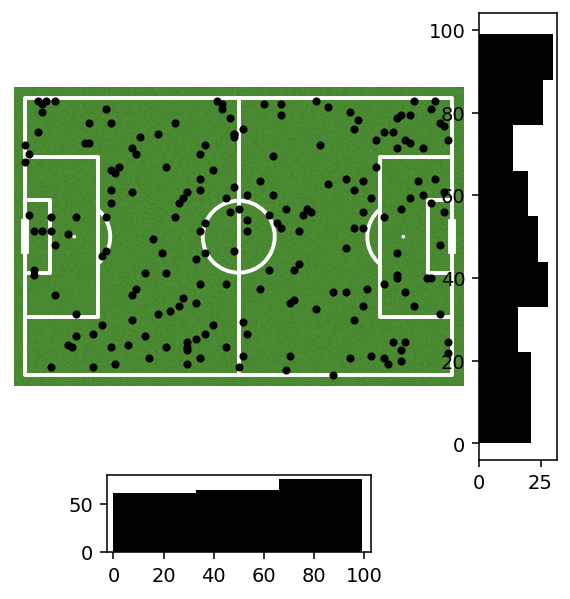

In [ ]:
from mplsoccer.pitch import Pitch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.DataFrame(np.random.randint(0,100,size=(200, 2)), columns=['X', 'Y'])
fig = plt.figure(figsize=(5,5), dpi = 140)
grid = plt.GridSpec(6, 6)

a1 = fig.add_subplot(grid[0:5, 0:5])
a2 = fig.add_subplot(grid[5, 1:4],sharex=a1)
a3 = fig.add_subplot(grid[0:5, 5],sharey=a1)

pitch = Pitch(pitch_color='grass', pitch_type='opta', line_color='white', stripe=False)
pitch.draw(ax=a1)
pitch.scatter(df['X'], df['Y'],
                    s=10, c='black', label='scatter', ax=a1)

a2.hist(df['Y'], 3, color = 'black', histtype='stepfilled')
a3.hist(df['X'], 9, orientation='horizontal', color='black', histtype='stepfilled')

plt.show()

In [ ]:
# Converter AM para PM

def convert_AM_to_PM(hora_am:str):

    dict_AM_PM = {str(hora_am):str(hora_pm) for hora_pm, hora_am in zip(range(13, 25), range(1, 13))}

    hora_PM = dict_AM_PM[str(hora_am)]

    print(f'A hora em PM é {hora_PM}')
    
convert_AM_to_PM(hora_am=4)

A hora em PM é 16
